In [38]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
import numpy
import scipy
import math
import matplotlib
import matplotlib.dates as mpd
import pylab as plt
import datetime as dtm
import pytz
import multiprocessing as mpp
import pickle
import sys
import os
#import lmod
# lmod.load('system')
# lmod.load('texlive')
# lmod.
#
# TODO: phase out unreferenced hpc_lib calls...
import hpc_lib
import hpc_reports
#
# def running_mean(X,n=10):
#     return (numpy.cumsum(numpy.insert(X,0,0))[n:] - numpy.cumsum(numpy.insert(X,0,0))[:-n])/n
# #

In [40]:
n_cpus = 4

In [41]:
N_report_len = 180
end_dtm = dtm.datetime(2022,6,20)
end_date = end_dtm.date()
start_date = end_date - dtm.timedelta(days=N_report_len)
print('*** dates: {} - {}'.format(start_date, end_date))
#partition='serc'
partition=None
group=None
s_user=None
# group='oneillm'
# group='edunham'
#s_user = 'labraha2'
#
sacct_h5_file = f'sacct_data/sacct_p{str(partition).upper()}_g{str(group).upper()}_u{s_user}_{start_date.year:04}{start_date.month:02}{start_date.day:02}_{end_dtm.year:04}{end_dtm.month:02}{end_dtm.day:02}.h5'
print(f'*** sacct_h5_file: {sacct_h5_file}')
# NOTE: to get individual users, eg to get Eric's group usage:
#. sacct --allusers --user=labraha2 --start=2022-01-01 --end=2022-06-15
#
# NOTE: additional options can be passed in the more_options=[] arrary, or just as sacct_{option-name}={val}
#
if os.path.isfile(sacct_h5_file):
    print('*** Creating SACCT object from HDF5 {}'.format(sacct_h5_file))
    SACCT_obj = hpc_lib.SACCT_data_from_h5(sacct_h5_file, keep_raw_data=False, n_cpu=n_cpus)
    #
    
else:
    print('*** Fetching SACCT data directly')
    SACCT_obj = hpc_lib.SACCT_data_direct(group=group, partition=partition, start_date=str(start_date),
                                          n_cpu=n_cpus, verbose=1,
                                          end_date=str(end_date), keep_raw_data=False)
    # , sacct_user=s_user
    print(f'** writing HDF5: {sacct_h5_file}')
    SACCT_obj.write_hdf5(sacct_h5_file)
    #
#
print('** ', SACCT_obj.jobs_summary.dtype.names)

*** dates: 2021-12-22 - 2022-06-20
*** sacct_h5_file: sacct_data/sacct_pNONE_gNONE_uNone_20211222_20220620.h5
*** Creating SACCT object from HDF5 sacct_data/sacct_pNONE_gNONE_uNone_20211222_20220620.h5
**  ('index', 'User', 'Group', 'GID', 'JobName', 'JobID', 'JobIDRaw', 'Partition', 'State', 'Timelimit', 'NCPUS', 'NNodes', 'Submit', 'Eligible', 'Start', 'End', 'Elapsed', 'SystemCPU', 'UserCPU', 'TotalCPU', 'NTasks', 'CPUTimeRAW', 'Suspended', 'ReqTRES', 'AllocTRES', 'JobID_parent')


In [42]:
cpuh_bin = 1.
cpu_hrs_jobs = SACCT_obj.get_cpu_hours_layer_cake(layer_field='Partition', verbose=True, bin_size=cpuh_bin)

***  {'schroeder': {}, 'gpu': {}, 'suprib': {}, 'ere': {}, 'beroza': {}, 'tgp': {}, 'cees': {}, 'sep': {}, 'clab': {}, 'temp': {}, 'twohour': {}}
*** ky: schroeder // b'schroeder'
*** ky: gpu // b'gpu'
*** ky: suprib // b'suprib'
*** ky: ere // b'ere'
*** ky: beroza // b'beroza'
*** ky: tgp // b'tgp'
*** ky: cees // b'cees'
*** ky: sep // b'sep'
*** ky: clab // b'clab'
*** ky: temp // b'temp'
*** ky: twohour // b'twohour'


In [43]:

print('** ', SACCT_obj.jobs_summary.dtype)
print('** ', type(SACCT_obj.jobs_summary['User'][0]))
#
my_ary = numpy.array(len(SACCT_obj.jobs_summary), dtype=SACCT_obj.jobs_summary.dtype)
print('** ', my_ary.dtype)
#
for cl,tp in SACCT_obj.jobs_summary.dtype.descr:
    print('** ', cl, tp)
    

print('** ** ', SACCT_obj.jobs_summary['Group'].astype(str)[0])


**  [('index', '<i8'), ('User', 'S8'), ('Group', 'S5'), ('GID', 'S3'), ('JobName', 'S29'), ('JobID', 'S20'), ('JobIDRaw', 'S7'), ('Partition', 'S9'), ('State', 'S19'), ('Timelimit', '<f8'), ('NCPUS', '<i8'), ('NNodes', '<i8'), ('Submit', '<f8'), ('Eligible', '<f8'), ('Start', '<f8'), ('End', '<f8'), ('Elapsed', '<f8'), ('SystemCPU', '<f8'), ('UserCPU', '<f8'), ('TotalCPU', '<f8'), ('NTasks', '<f8'), ('CPUTimeRAW', 'S9'), ('Suspended', 'S8'), ('ReqTRES', 'S44'), ('AllocTRES', 'S60'), ('JobID_parent', 'S20')]
**  <class 'numpy.bytes_'>
**  [('index', '<i8'), ('User', 'S8'), ('Group', 'S5'), ('GID', 'S3'), ('JobName', 'S29'), ('JobID', 'S20'), ('JobIDRaw', 'S7'), ('Partition', 'S9'), ('State', 'S19'), ('Timelimit', '<f8'), ('NCPUS', '<i8'), ('NNodes', '<i8'), ('Submit', '<f8'), ('Eligible', '<f8'), ('Start', '<f8'), ('End', '<f8'), ('Elapsed', '<f8'), ('SystemCPU', '<f8'), ('UserCPU', '<f8'), ('TotalCPU', '<f8'), ('NTasks', '<f8'), ('CPUTimeRAW', 'S9'), ('Suspended', 'S8'), ('ReqTRES', 'S

In [44]:
print('*** ', cpu_hrs_jobs.keys())
print('*** ', cpu_hrs_jobs['sep']['cpu_hours'].dtype)

***  dict_keys(['schroeder', 'gpu', 'suprib', 'ere', 'beroza', 'tgp', 'cees', 'sep', 'clab', 'temp', 'twohour'])
***  [('time', '>f8'), ('t_start', '>f8'), ('cpu_hours', '>f8'), ('N_jobs', '>f8')]


In [45]:
print('** ', cpu_hrs_jobs['sep']['cpu_hours']['time'][0:25])

**  [738192.37304398 738192.39357516 738192.41410633 738192.43463751
 738192.45516868 738192.47569986 738192.49623104 738192.51676221
 738192.53729339 738192.55782456 738192.57835574 738192.59888691
 738192.61941809 738192.63994927 738192.66048044 738192.68101162
 738192.70154279 738192.72207397 738192.74260514 738192.76313632
 738192.7836675  738192.80419867 738192.82472985 738192.84526102
 738192.8657922 ]


*** schroeder: sum(dz): 998.8888911214561
*** gpu: sum(dz): 4866.868687244357
*** suprib: sum(dz): 46100.19419846471
*** ere: sum(dz): 8456.49747915054
*** beroza: sum(dz): 7794.066610915811
*** tgp: sum(dz): 8023.251692576534
*** cees: sum(dz): 2017.2439814640397
*** sep: sum(dz): 11472.8819008909
*** clab: sum(dz): 9458.723514635285
*** temp: sum(dz): 394.2353749961587
*** twohour: sum(dz): 88586.02246890496
schroeder: 1059.2233333333334 cpu-hrs
gpu: 82062.85555555555 cpu-hrs
suprib: 889894.0888888888 cpu-hrs
ere: 140918.55861111108 cpu-hrs
beroza: 1547.1333333333332 cpu-hrs
tgp: 127839.14749999995 cpu-hrs
cees: 16486.033333333333 cpu-hrs
sep: 112129.44666666666 cpu-hrs
clab: 156307.55555555556 cpu-hrs
temp: 74.79333333333332 cpu-hrs
twohour: 1512891.9300000002 cpu-hrs


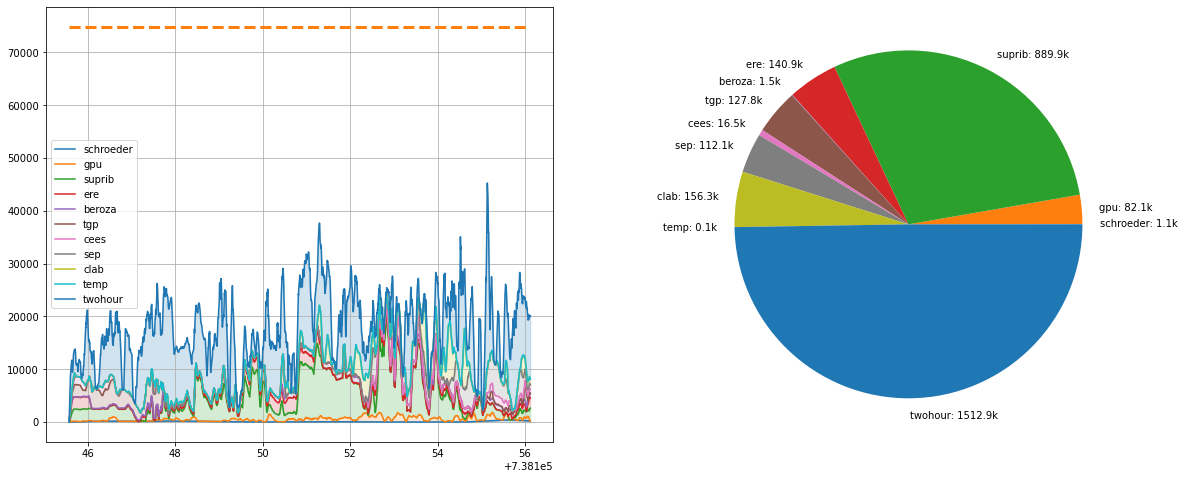

In [46]:
fg = plt.figure(figsize=(20,8))
ax1 = fg.add_subplot(1,2,1)
ax2 = fg.add_subplot(1,2,2)
ax1.grid()
#
N_max = float(130*24*24)
#
cpuh = next(iter(cpu_hrs_jobs.values()))
z = numpy.zeros(len(cpuh['cpu_hours']))
X = cpuh['cpu_hours']['time']
dX = X[1]-X[0]
#
elapsed = {}

for pt,vls in cpu_hrs_jobs.items():
#     if vls['elapsed'] == 0.:
#         continue
    #print('*** {}: {}'.format(pt, vls.keys()))
    #
    elapsed[pt]=vls['elapsed']
    #
    z_prev = z.copy()
    dz = vls['cpu_hours']['cpu_hours']
    print('*** {}: sum(dz): {}'.format(pt, dX*numpy.sum(dz)/cpuh_bin))
    z += dz
    ln, = ax1.plot(X, z, label=pt)
    clr = ln.get_color()
    ax1.fill_between(X, z_prev, z, color=clr, alpha=.2)
    #
    #ax1.fill_between(X, z_prev, z, alpha=.2)

ax1.plot(X[0::len(X)-1], numpy.ones(2)*N_max, ls='--', lw=3.)
ax1.legend(loc=0)
#
# fg.canvas.draw()
# print('*** ax1.get_xticklabels(): ', [s.get_text() for s in ax1.get_xticklabels()])

# lbls = [hpc_lib.simple_date_string(mpd.num2date(float(hpc_lib.fix_to_ascii(str(s.get_text())))) ) 
#          for s in ax1.get_xticklabels()]
# print('*** ', [s for s in ax1.get_xticklabels()])
# print('*** ', [s.get_position()[0] for s in ax1.get_xticklabels()])
# ax1.set_xticklabels(lbls)
# fg.canvas.draw()
#
pi_lbls, pi_vls = zip(*list(elapsed.items()))
pi_lbls = [f'{lbl}: {24.*x/1000:.1f}k' for lbl,x in zip(pi_lbls, pi_vls)]
ax2.pie(pi_vls, labels=pi_lbls)
#
for ky,vl in elapsed.items():
    print(f'{ky}: {vl*24.} cpu-hrs')
    

In [47]:
print('** ', numpy.sum([x for x in elapsed.values()])*24.)


**  3041210.7661111113


In [48]:
print('*** ', numpy.min(SACCT_obj.jobs_summary['Start']) , numpy.min(SACCT_obj.jobs_summary['End']))

***  738123.0626388888 738146.0021759259


In [49]:
# Now, let's get a some reports for specific users, namely Lauren and Eric's former student(s) to estimate
#. requirements for their successors.
#
# Also, TODO: layer cake for active_cpus ?
# NOTE: for up and coming "how busy is the queue?" reporting, something like this:
# squeue -p serc --Format=jobid,jobarrayid,partition,username,state,timeused,timeleft,allocnodes,numnodes,numcpus


In [50]:
cpuh_jobs = SACCT_obj.get_cpu_hours(bin_size=1., n_points=5000)

In [51]:
cpuh_layers = SACCT_obj.get_cpu_hours_layer_cake_2(bin_size=1.)

***  [('time', '>f8'), ('schroeder', '>f8'), ('gpu', '>f8'), ('suprib', '>f8'), ('ere', '>f8'), ('beroza', '>f8'), ('tgp', '>f8'), ('cees', '>f8'), ('sep', '>f8'), ('clab', '>f8'), ('temp', '>f8'), ('twohour', '>f8')]
***  [738146.00162037 738146.03762724 738146.07363412 738146.10964099
 738146.14564786 738146.18165473 738146.21766161 738146.25366848
 738146.28967535 738146.32568222]
***  [   0.          452.72665939  897.0199886  1319.77332522 1762.92665398
 2192.19575027 2613.86557073 2947.09539085 3376.58664968 3820.72665377]


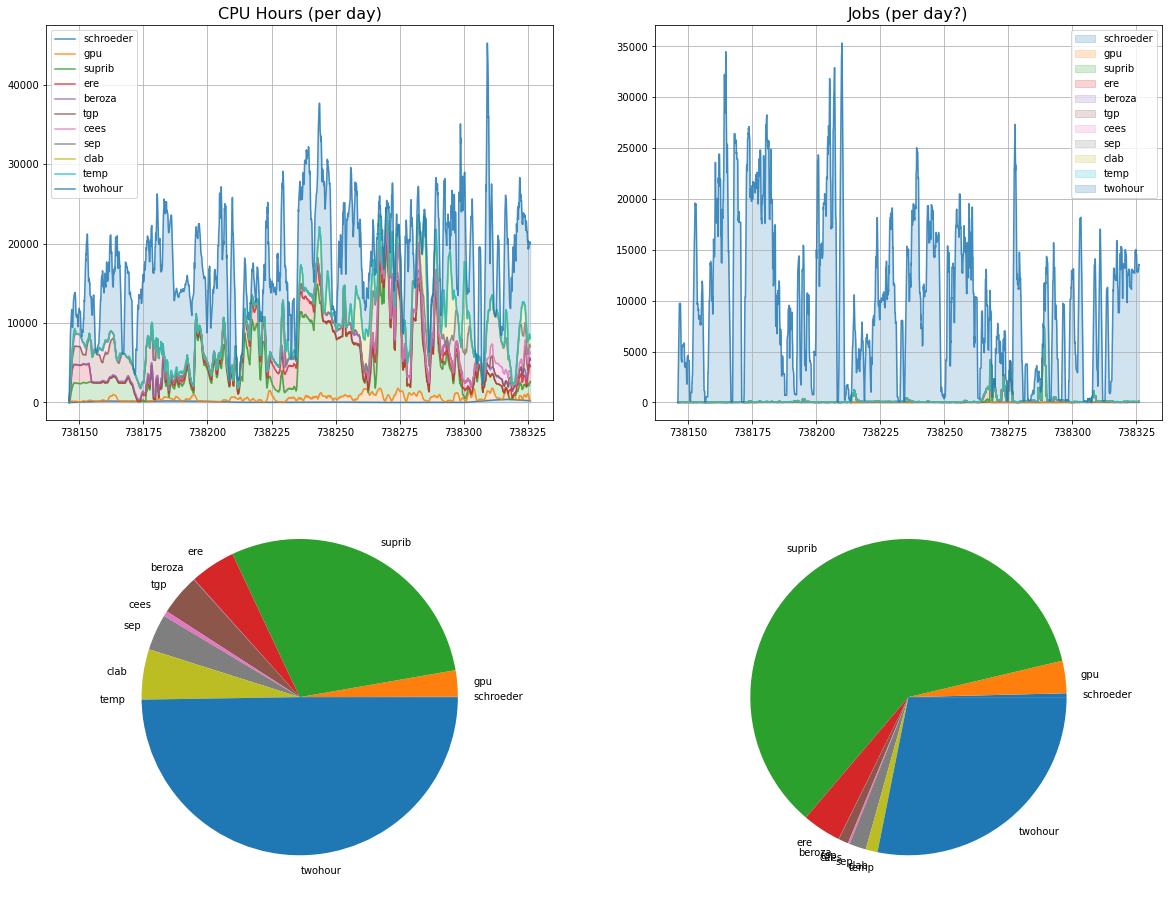

In [52]:
fg = plt.figure(figsize=(20,16))
ax1 = fg.add_subplot(2,2,1)
ax2 = fg.add_subplot(2,2,2)
ax3 = fg.add_subplot(2,2,3)
ax4 = fg.add_subplot(2,2,4)
ax1.grid()
ax2.grid()
#
ax1.set_title('CPU Hours (per day)', size=16)
ax2.set_title('Jobs (per day?)', size=16)
#
cpuh = cpuh_layers['cpu_hours']
jobs = cpuh_layers['jobs']
T = cpuh['time']

print('*** ', cpuh.dtype)
print('*** ', cpuh['time'][0:10])
print('*** ', cpuh['twohour'][0:10])

z_cpuh = numpy.zeros(len(cpuh))
z_jobs = numpy.zeros(len(jobs))
for lyr in cpuh.dtype.names:
    if lyr == 'time':
        continue
    #
    z_cpuh_prev = z_cpuh.copy()
    z_jobs_prev = z_jobs.copy()
    dz_cpuh = cpuh[lyr]
    dz_jobs = jobs[lyr]
    #
    z_cpuh += dz_cpuh
    z_jobs += dz_jobs
    #
    
    ln_cpuh, = ax1.plot(T, z_cpuh, ls='-', alpha=.8, label=lyr)
    clr = ln_cpuh.get_color()
    ax1.fill_between(T, z_cpuh_prev, z_cpuh, color=clr, alpha=.2)
    #
    ln_jobs, = ax2.plot(T, z_jobs, ls='-', alpha=.8)
    clr = ln_jobs.get_color()
    ax2.fill_between(T, z_jobs_prev, z_jobs, color=clr, alpha=.2, label=lyr)
#
# pi charts. left: cpu-hours, right job-time
pi_cpuh_lbls, pi_cpuh_vls = zip(*list(cpuh_layers['elapsed'].items()))
pi_jobs_lbls, pi_jobs_vls = zip(*list({ky:numpy.sum(SACCT_obj.jobs_summary['Elapsed'][SACCT_obj.jobs_summary['Partition']==ky.encode()]) for ky in cpuh.dtype.names[1:]}.items()))
#
ax3.pie(pi_cpuh_vls, labels=pi_cpuh_lbls)
ax4.pie(pi_jobs_vls, labels=pi_jobs_lbls)
#
ax1.legend(loc=0)
ax2.legend(loc=0)
#
fg.canvas.draw()
# for ax in (ax1, ax2):
#     lbls = [hpc_lib.simple_date_string(mpd.num2date(float(hpc_lib.fix_to_ascii(str(s.get_text())))) ) 
#              for s in ax.get_xticklabels()]
#     ax.set_xticklabels(lbls)
#fg.canvas.draw()
#lbls = [hpc_lib.simple_date_string(mpd.num2date(float(hpc_lib.fix_to_ascii(str(s.get_text())))) ) 
#         for s in ax1.get_xticklabels()]
#ax1.set_xticklabels(lbls)


In [53]:
pi_cpuh_vls, pi_cpuh_lbls = zip(*list(cpuh_layers['elapsed'].items()))
pi_jobs_vls, pi_jobs_lbls = zip(*list({ky:numpy.sum(SACCT_obj.jobs_summary['Elapsed'][SACCT_obj.jobs_summary['Partition']==ky.encode()]) for ky in cpuh.dtype.names[1:]}.items()))

In [54]:
print('** ', pi_cpuh_vls, pi_cpuh_lbls)
print('** ', pi_jobs_vls, pi_jobs_lbls)

**  ('schroeder', 'gpu', 'suprib', 'ere', 'beroza', 'tgp', 'cees', 'sep', 'clab', 'temp', 'twohour') (44.13430555555556, 3419.2856481481476, 37078.92037037037, 5871.606608796295, 64.46388888888889, 5326.631145833331, 686.9180555555555, 4672.060277777778, 6512.814814814816, 3.1163888888888884, 63037.16375000001)
**  ('schroeder', 'gpu', 'suprib', 'ere', 'beroza', 'tgp', 'cees', 'sep', 'clab', 'temp', 'twohour') (44.13430555555556, 376.92251157407406, 6833.0237847222215, 449.0079513888889, 2.68599537037037, 114.15144675925927, 21.476493055555554, 194.67011574074073, 138.29057870370372, 0.12984953703703703, 3200.0945601851863)


In [55]:
jobs_cpu = SACCT_obj.active_jobs_cpu(n_points=5000, bin_size=None, t_min=None, t_max=None, t_now=None, n_cpu=None, 
                                     jobs_summary=None, verbose=None, mpp_chunksize=10000, nan_to=0.)


*** DEBUG: 5000, None


In [56]:
jobs_cpu.dtype

dtype([('time', '>f8'), ('N_jobs', '>f8'), ('N_cpu', '>f8')])

In [57]:
acpu_layer_cake = SACCT_obj.get_active_cpus_layer_cake(layer_field='Partition')

*** DEBUG: 5000, None
*** DEBUG: 5000, None
*** DEBUG: 5000, None
*** DEBUG: 5000, None
*** DEBUG: 5000, None
*** DEBUG: 5000, None
*** DEBUG: 5000, None
*** DEBUG: 5000, None
*** DEBUG: 5000, None
** ** **: t_start, t_end:  [738162.09887731] [738162.22872685]
*** DEBUG: 5000, None
*** DEBUG: 5000, None


In [87]:
print('** ', acpu_layer_cake.keys())
print('** ', len(T)/(T[-1] - T[0]))

**  dict_keys(['N_cpu', 'N_jobs'])
**  27.77803140948428


***  [('time', '>f8'), ('schroeder', '>f8'), ('gpu', '>f8'), ('suprib', '>f8'), ('ere', '>f8'), ('beroza', '>f8'), ('tgp', '>f8'), ('cees', '>f8'), ('sep', '>f8'), ('clab', '>f8'), ('temp', '>f8'), ('twohour', '>f8')]
***  [738146.00162037 738146.03762724 738146.07363412 738146.10964099
 738146.14564786 738146.18165473 738146.21766161 738146.25366848
 738146.28967535 738146.32568222]
***  [1512.    0.    0.    0.    0. 2040. 2040. 2040.    0.    0.]


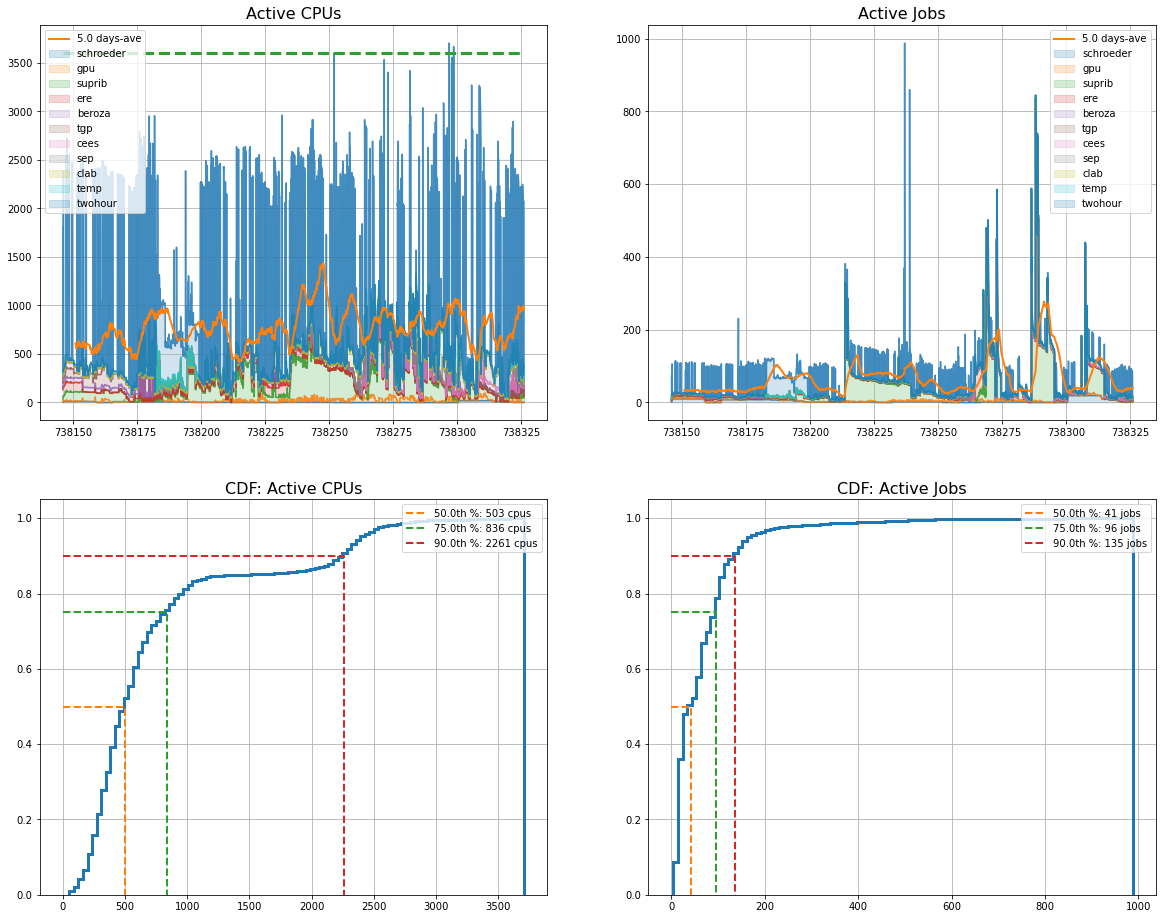

In [90]:
fg = plt.figure(figsize=(20,16))
ax1 = fg.add_subplot(2,2,1)
ax2 = fg.add_subplot(2,2,2)
ax3 = fg.add_subplot(2,2,3)
ax4 = fg.add_subplot(2,2,4)
ax1.grid()
ax2.grid()
#
ax1.set_title('Active CPUs', size=16)
ax2.set_title('Active Jobs', size=16)
ax3.set_title('CDF: Active CPUs', size=16)
ax4.set_title('CDF: Active Jobs', size=16)
#
cpus = acpu_layer_cake['N_cpu']
jobs = acpu_layer_cake['N_jobs']
T = cpus['time']
N_max = 150*24.
#
print('*** ', cpus.dtype)
print('*** ', cpus['time'][0:10])
print('*** ', cpus['twohour'][0:10])

z_cpus = numpy.zeros(len(cpus))
z_jobs = numpy.zeros(len(jobs))
for lyr in cpus.dtype.names:
    if lyr == 'time':
        continue
    #
    z_cpus_prev = z_cpus.copy()
    z_jobs_prev = z_jobs.copy()
    dz_cpus = cpus[lyr]
    dz_jobs = jobs[lyr]
    #
    z_cpus += dz_cpus
    z_jobs += dz_jobs
    #
    ln_cpus, = ax1.plot(T, z_cpus, ls='-', alpha=.8)
    clr = ln_cpus.get_color()
    ax1.fill_between(T, z_cpus_prev, z_cpus, color=clr, alpha=.2, label=lyr)
    #
    ln_jobs, = ax2.plot(T, z_jobs, ls='-', alpha=.8)
    clr = ln_jobs.get_color()
    ax2.fill_between(T, z_jobs_prev, z_jobs, color=clr, alpha=.2, label=lyr)
#
# get an ave-len of about a day...
n_days=5.
ave_len = int(numpy.ceil(n_days*len(T)/(T[-1] - T[0])))
z_cpus_smooth = hpc_lib.running_mean(z_cpus, ave_len)
z_jobs_smooth = hpc_lib.running_mean(z_jobs, ave_len)
#
ax1.plot(T[-len(z_cpus_smooth):], z_cpus_smooth, ls='-', marker='', lw=2, label=f'{n_days} days-ave')
ax2.plot(T[-len(z_jobs_smooth):], z_jobs_smooth, ls='-', marker='', lw=2, label=f'{n_days} days-ave')
#
# # pi charts. left: cpu-hours, right job-time
def f_ix(ky, sacct_obj):
    return [sacct_obj.jobs_summary['Partition']==ky.encode()]
#
# Pie charts aren't really 
# pi_cpus_lbls, pi_cpus_vls = zip(*list({ky:numpy.sum(SACCT_obj.jobs_summary['Elapsed'][f_ix(ky, SACCT_obj)]*SACCT_obj.jobs_summary['NCPUS'][f_ix(ky, SACCT_obj)]) for ky in cpuh.dtype.names[1:]}.items()))
# pi_jobs_lbls, pi_jobs_vls = zip(*list({ky:numpy.sum(SACCT_obj.jobs_summary['Elapsed'][SACCT_obj.jobs_summary['Partition']==ky.encode()]) for ky in cpuh.dtype.names[1:]}.items()))
# # #
# ax3.pie(pi_cpus_vls, labels=pi_cpus_lbls)
# ax4.pie(pi_jobs_vls, labels=pi_jobs_lbls)
#
qs = numpy.array([.5, .75, .9])
qs_cpus = numpy.quantile(z_cpus, qs)
qs_jobs = numpy.quantile(z_jobs, qs)
#
hh_cpus = ax3.hist(z_cpus, bins=100, cumulative=True, density=True, histtype='step', lw=3.)
for x,y in zip(qs_cpus, qs):
    #ax3.plot([0., qs_cpus[-1], qs_cpus[-1]], [qs[-1], qs[-1], 0.], ls='--', color='r', lw=2. )
    ax3.plot([0., x, x], [y, y, 0.], ls='--', lw=2., label=f'{y*100.}th %: {x:.0f} cpus' )
#
hh_jobs = ax4.hist(z_jobs, bins=100, cumulative=True, density=True, histtype='step', lw=3.)
for x,y in zip(qs_jobs, qs):
    #ax3.plot([0., qs_cpus[-1], qs_cpus[-1]], [qs[-1], qs[-1], 0.], ls='--', color='r', lw=2. )
    ax4.plot([0., x, x], [y, y, 0.], ls='--', lw=2., label=f'{y*100.}th %: {x:.0f} jobs' )



#
ax1.plot(T[0::len(T)-1], numpy.ones(2)*N_max, ls='--', lw=3.0  )
#
ax1.legend(loc=0)
ax2.legend(loc=0)
ax3.legend(loc=0)
ax4.legend(loc=0)
#
ax3.grid()
ax4.grid()

# fg.canvas.draw()
# for ax in (ax1, ax2):
#     lbls = [hpc_lib.simple_date_string(mpd.num2date(float(hpc_lib.fix_to_ascii(str(s.get_text())))) ) 
#              for s in ax.get_xticklabels()]
#     ax.set_xticklabels(lbls)
# fg.canvas.draw()



In [86]:
print('*** ', mpd.num2date(738150))
print('*** ', mpd.date2num(dtm.datetime(2022,1,1)))
print('*** ', 3600/24)
#
print('** ', SACCT_obj.jobs_summary.dtype.descr)
print('** cpu_hours capacity: ', 350*24*24)

***  3990-12-27 00:00:00+00:00
***  18993.0
***  150.0
**  [('index', '<i8'), ('User', ('|S8', {'h5py_encoding': 'ascii'})), ('Group', ('|S5', {'h5py_encoding': 'ascii'})), ('GID', ('|S3', {'h5py_encoding': 'ascii'})), ('JobName', ('|S29', {'h5py_encoding': 'ascii'})), ('JobID', ('|S20', {'h5py_encoding': 'ascii'})), ('JobIDRaw', ('|S7', {'h5py_encoding': 'ascii'})), ('Partition', ('|S9', {'h5py_encoding': 'ascii'})), ('State', ('|S19', {'h5py_encoding': 'ascii'})), ('Timelimit', '<f8'), ('NCPUS', '<i8'), ('NNodes', '<i8'), ('Submit', '<f8'), ('Eligible', '<f8'), ('Start', '<f8'), ('End', '<f8'), ('Elapsed', '<f8'), ('SystemCPU', '<f8'), ('UserCPU', '<f8'), ('TotalCPU', '<f8'), ('NTasks', '<f8'), ('CPUTimeRAW', ('|S9', {'h5py_encoding': 'ascii'})), ('Suspended', ('|S8', {'h5py_encoding': 'ascii'})), ('ReqTRES', ('|S44', {'h5py_encoding': 'ascii'})), ('AllocTRES', ('|S60', {'h5py_encoding': 'ascii'})), ('JobID_parent', ('|S20', {'h5py_encoding': 'ascii'}))]
** cpu_hours capacity:  20160